<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab08/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório: Redes Neurais Convolucionais (CNNs) - Do Básico ao Avançado

## 🎯 Objetivos de Aprendizagem

Ao final desta aula, você será capaz de:

1. **Compreender** os fundamentos matemáticos das CNNs
2. **Implementar** redes convolucionais do zero usando TensorFlow/Keras
3. **Aplicar** técnicas avançadas como data augmentation e transfer learning
4. **Comparar** CNNs com MLPs tradicionais
5. **Resolver** problemas reais de visão computacional
6. **Otimizar** modelos para diferentes cenários

## 📚 Material de Apoio Obrigatório

📖 **Leitura complementar**: [cnn_guia_completo.md](./cnn_guia_completo.md) - Guia teórico completo sobre CNNs

## 🧠 Por que CNNs são Revolucionárias?

### 💡 Problema com MLPs Tradicionais

Imagine processar uma imagem **400×600 pixels** com um MLP:
- **Parâmetros**: 400 × 600 × 100 + 100 = **24.000.100** parâmetros só na primeira camada!
- **Problemas**: 
  - 🚫 Ignora estrutura espacial
  - 🚫 Sensível à posição
  - 🚫 Computacionalmente caro
  - 🚫 Overfitting garantido

### ✨ Solução das CNNs

- ✅ **Compartilhamento de pesos**: Mesmos filtros em toda imagem
- ✅ **Invariância espacial**: Reconhece padrões independente da posição  
- ✅ **Hierarquia de features**: Bordas → Formas → Objetos
- ✅ **Eficiência**: Drasticamente menos parâmetros

### 🔬 Inspiração Biológica

As CNNs são inspiradas no **córtex visual** dos mamíferos:

```
Células simples → Células complexas → Área V1 → V2 → V4 → IT
      ↓              ↓              ↓    ↓    ↓    ↓
   Bordas         Formas       Texturas → Partes → Objetos
```

## 🔧 Configuração do Ambiente

Vamos começar importando todas as bibliotecas necessárias e configurando o ambiente de desenvolvimento.

In [ ]:
# Importações essenciais
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configurações para reprodutibilidade
tf.random.set_seed(42)
np.random.seed(42)

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Verificar GPU disponível
print("🔧 CONFIGURAÇÃO DO AMBIENTE")
print("=" * 50)
print(f"TensorFlow versão: {tf.__version__}")
print(f"Keras versão: {keras.__version__}")
print(f"GPUs disponíveis: {len(tf.config.list_physical_devices('GPU'))}")

if tf.config.list_physical_devices('GPU'):
    print("✅ GPU detectada e configurada!")
    for gpu in tf.config.list_physical_devices('GPU'):
        print(f"   📱 {gpu}")
else:
    print("⚠️ Executando em CPU - considere usar GPU para melhor performance")

print("\n🚀 Ambiente configurado com sucesso!")

## 📊 Parte 1: CNN vs MLP - Comparação Prática

Vamos demonstrar **por que CNNs são superiores** para dados de imagem através de uma comparação direta.

### 🔍 Análise de Parâmetros

In [ ]:
# Demonstração: MLP vs CNN - Número de Parâmetros
print("🔢 COMPARAÇÃO: MLP vs CNN - NÚMERO DE PARÂMETROS")
print("=" * 60)

# Definindo dimensões de uma imagem típica
altura, largura, canais = 400, 600, 3
total_pixels = altura * largura * canais

print(f"📐 Imagem exemplo: {altura}×{largura}×{canais} = {total_pixels:,} pixels")

# MLP Tradicional
print(f"\n🧠 MLP TRADICIONAL:")
print(f"   Entrada: {total_pixels:,} pixels (flattened)")
print(f"   Primeira camada: 100 neurônios")
parametros_mlp = total_pixels * 100 + 100  # pesos + bias
print(f"   Parâmetros primeira camada: {parametros_mlp:,}")
print(f"   💾 Memória aproximada: {parametros_mlp * 4 / 1024**2:.2f} MB")

# CNN Equivalente
print(f"\n🔍 CNN EQUIVALENTE:")
print(f"   Entrada: {altura}×{largura}×{canais}")
print(f"   Conv2D: 32 filtros 3×3")
parametros_cnn = (3 * 3 * canais * 32) + 32  # kernel_size × input_channels × filters + bias
print(f"   Parâmetros primeira camada: {parametros_cnn:,}")
print(f"   💾 Memória aproximada: {parametros_cnn * 4 / 1024**2:.4f} MB")

print(f"\n📊 COMPARAÇÃO:")
reducao = parametros_mlp / parametros_cnn
print(f"   🔻 Redução de parâmetros: {reducao:.0f}x")
print(f"   💰 Economia de memória: {(1 - parametros_cnn/parametros_mlp)*100:.1f}%")

In [ ]:
# Criando os modelos para comparação visual
print("🏗️ CONSTRUINDO MODELOS PARA COMPARAÇÃO")
print("=" * 50)

# Modelo MLP (simplificado para demonstração)
mlp_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # MNIST para exemplo prático
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="MLP_Model")

# Modelo CNN equivalente
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="CNN_Model")

print("📋 RESUMO DOS MODELOS:")
print("\n🧠 MLP Model:")
mlp_model.summary()

print("\n🔍 CNN Model:")
cnn_model.summary()

# Comparação de parâmetros
mlp_params = mlp_model.count_params()
cnn_params = cnn_model.count_params()

print(f"\n📊 COMPARAÇÃO FINAL:")
print(f"   MLP parâmetros: {mlp_params:,}")
print(f"   CNN parâmetros: {cnn_params:,}")
print(f"   CNN é {mlp_params/cnn_params:.1f}x mais eficiente!")

### 🎨 Visualizando a Diferença Estrutural

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/flatten.png?raw=1" width="600px">

**Problemas do MLP para Imagens:**
- 🚫 **Perda de estrutura espacial**: Pixels são tratados independentemente
- 🚫 **Invariância limitada**: Sensível à posição dos objetos
- 🚫 **Explosão de parâmetros**: Cresce exponencialmente com o tamanho da imagem
- 🚫 **Overfitting**: Muitos parâmetros para poucos dados

**Vantagens da CNN:**
- ✅ **Preserva estrutura espacial**: Convoluções mantêm relações espaciais
- ✅ **Compartilhamento de pesos**: Mesmo filtro detecta padrão em qualquer posição
- ✅ **Hierarquia de features**: Aprende características progressivamente
- ✅ **Eficiência computacional**: Muito menos parâmetros

## 🔬 Parte 2: Operação de Convolução - O Coração das CNNs

### 🧮 Fundamentos Matemáticos

A **convolução** é uma operação matemática fundamental que permite **filtragem no domínio espacial**. É aplicada através de **filtros/kernels** que "varrem" a imagem para detectar padrões específicos.

#### 📐 Fórmula da Convolução 2D:
```
S(i,j) = (I * K)(i,j) = ΣΣ I(i+m, j+n) × K(m,n)
                        m n
```

Onde:
- `I`: Imagem de entrada
- `K`: Kernel/filtro  
- `S`: Feature map (resultado)

### 🎯 Como Funciona a Convolução

#### 1️⃣ **Kernel percorre a imagem**
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/same_padding_no_strides.gif?raw=1" width="400px">

*O kernel (cinza) varre a imagem (azul) produzindo o feature map (verde)*

#### 2️⃣ **Operação em cada posição**
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convolution.png?raw=1" width="500px">

*Produto elemento a elemento + soma = valor do pixel no feature map*

#### 3️⃣ **Resultado para cada pixel**
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/conv3d.gif?raw=1" width="400px">

*Visualização 3D da operação de convolução*

#### 4️⃣ **Resultado final na imagem**
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convexp.png?raw=1" width="600px">

*Diferentes kernels detectam diferentes características*

In [ ]:
# Demonstração prática da operação de convolução
print("🔬 DEMONSTRAÇÃO PRÁTICA: OPERAÇÃO DE CONVOLUÇÃO")
print("=" * 60)

# Criando uma imagem simples para demonstração
import numpy as np
import matplotlib.pyplot as plt

# Imagem 5x5 simples
imagem = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1], 
    [1, 0, 1, 2, 0],
    [2, 1, 0, 1, 2],
    [1, 0, 2, 1, 0]
])

# Kernel detector de borda vertical
kernel_vertical = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Kernel detector de borda horizontal  
kernel_horizontal = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

# Kernel detector de borda (Laplaciano)
kernel_borda = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

def aplicar_convolucao_manual(imagem, kernel):
    """Aplica convolução manualmente para demonstração"""
    img_h, img_w = imagem.shape
    kernel_h, kernel_w = kernel.shape
    
    # Tamanho da saída
    out_h = img_h - kernel_h + 1
    out_w = img_w - kernel_w + 1
    
    resultado = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            # Região da imagem
            regiao = imagem[i:i+kernel_h, j:j+kernel_w]
            # Produto elemento a elemento + soma
            resultado[i, j] = np.sum(regiao * kernel)
    
    return resultado

# Aplicando diferentes kernels
resultado_vertical = aplicar_convolucao_manual(imagem, kernel_vertical)
resultado_horizontal = aplicar_convolucao_manual(imagem, kernel_horizontal)
resultado_borda = aplicar_convolucao_manual(imagem, kernel_borda)

# Visualização
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Imagem original
im1 = axes[0,0].imshow(imagem, cmap='gray')
axes[0,0].set_title('🖼️ Imagem Original')
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

# Kernels
im2 = axes[0,1].imshow(kernel_vertical, cmap='RdBu')
axes[0,1].set_title('🔍 Kernel Vertical')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

im3 = axes[0,2].imshow(kernel_horizontal, cmap='RdBu')
axes[0,2].set_title('🔍 Kernel Horizontal')
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])

im4 = axes[0,3].imshow(kernel_borda, cmap='RdBu')
axes[0,3].set_title('🔍 Kernel Borda')
axes[0,3].set_xticks([])
axes[0,3].set_yticks([])

# Resultados
axes[1,0].text(0.5, 0.5, 'Resultados →', ha='center', va='center', 
               transform=axes[1,0].transAxes, fontsize=12, fontweight='bold')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

im5 = axes[1,1].imshow(resultado_vertical, cmap='RdBu')
axes[1,1].set_title('📊 Bordas Verticais')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

im6 = axes[1,2].imshow(resultado_horizontal, cmap='RdBu')
axes[1,2].set_title('📊 Bordas Horizontais') 
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

im7 = axes[1,3].imshow(resultado_borda, cmap='RdBu')
axes[1,3].set_title('📊 Todas as Bordas')
axes[1,3].set_xticks([])
axes[1,3].set_yticks([])

plt.tight_layout()
plt.suptitle('🔬 Demonstração: Diferentes Kernels = Diferentes Características', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("✅ Observe como cada kernel detecta características diferentes!")
print("📝 Os valores nos feature maps indicam a 'força' da característica detectada")

In [ ]:
# Exemplo detalhado: calculando um pixel manualmente
print("🧮 EXEMPLO DETALHADO: CALCULANDO UM PIXEL")
print("=" * 50)

print("🖼️ Imagem (região 3×3):")
regiao = imagem[0:3, 0:3]
print(regiao)

print("\n🔍 Kernel (detector de borda):")
print(kernel_borda)

print("\n🧮 Cálculo passo a passo:")
print("Produto elemento a elemento:")
produto = regiao * kernel_borda
print(produto)

print(f"\n➕ Soma de todos os elementos: {np.sum(produto)}")
print(f"📊 Resultado para o pixel (0,0) do feature map: {np.sum(produto)}")

print("\n💡 Interpretação:")
if np.sum(produto) > 0:
    print("   ✅ Valor positivo → Borda detectada!")
else:
    print("   ❌ Valor baixo → Sem borda significativa")

## 💻 Implementação em Código - TensorFlow/Keras

### 🔧 Camada Convolucional

A implementação de uma camada convolucional é surpreendentemente simples:

```python
layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu', input_shape=(height, width, channels))
```

**Parâmetros principais:**
- 🔢 **filters**: Número de filtros (kernels) - define quantos feature maps são gerados
- 📐 **kernel_size**: Tamanho do filtro - (3,3) é mais comum
- ⚡ **activation**: Função de ativação aplicada após convolução
- 📊 **input_shape**: Formato da entrada (apenas na primeira camada)

**Parâmetros avançados:**
- 👣 **strides**: Passo do filtro (default: (1,1))
- 🎯 **padding**: 'valid' (sem padding) ou 'same' (mantém dimensão)
- 🔄 **dilation_rate**: Convoluções dilatadas para campo receptivo maior

In [ ]:
# Exemplo prático: implementando camada convolucional
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("💻 IMPLEMENTAÇÃO: CAMADA CONVOLUCIONAL")
print("=" * 50)

# Criando uma camada convolucional simples
model_conv = keras.Sequential([
    layers.Conv2D(
        filters=100, 
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(800, 600, 3),
        name="conv_layer_1"
    ),
])

print("📋 RESUMO DO MODELO:")
model_conv.summary()

print(f"\n🔍 ANÁLISE DA CAMADA:")
print(f"   📐 Entrada: (800, 600, 3)")
print(f"   🔢 Filtros: 100")
print(f"   📏 Kernel: 3×3")
print(f"   📊 Saída: (798, 798, 100)")  # 800-3+1 = 798
print(f"   🎯 Parâmetros: {(3*3*3 + 1) * 100:,}")  # (kernel×channels + bias) × filters

# Calculando parâmetros manualmente para verificação
kernel_params = 3 * 3 * 3  # kernel_size × kernel_size × input_channels
bias_params = 1
total_per_filter = kernel_params + bias_params
total_params = total_per_filter * 100  # × number of filters

print(f"\n🧮 CÁLCULO DE PARÂMETROS:")
print(f"   Por filtro: {kernel_params} (pesos) + {bias_params} (bias) = {total_per_filter}")
print(f"   Total: {total_per_filter} × {100} filtros = {total_params:,} parâmetros")

print("\n💡 OBSERVAÇÕES:")
print("   ✅ Cada filtro aprende a detectar uma característica específica")
print("   ✅ Mais filtros = mais características detectadas")
print("   ✅ Kernel 3×3 é o mais comum (bom balance eficiência/expressividade)")

In [ ]:
# Exemplo com diferentes configurações
print("🎛️ EXPLORANDO DIFERENTES CONFIGURAÇÕES")
print("=" * 50)

# Testando diferentes configurações
configs = [
    {"filters": 32, "kernel_size": (3,3), "nome": "Config Básica"},
    {"filters": 64, "kernel_size": (5,5), "nome": "Kernel Maior"},
    {"filters": 128, "kernel_size": (1,1), "nome": "Pointwise Conv"},
    {"filters": 32, "kernel_size": (3,3), "strides": (2,2), "nome": "Stride 2"},
]

for i, config in enumerate(configs):
    print(f"\n{i+1}️⃣ {config['nome']}:")
    
    # Removendo 'nome' para criar a camada
    layer_config = {k: v for k, v in config.items() if k != 'nome'}
    
    model_temp = keras.Sequential([
        layers.Conv2D(**layer_config, input_shape=(64, 64, 3))
    ])
    
    # Análise da configuração
    output_shape = model_temp.layers[0].output_shape[1:]  # Remove batch dimension
    params = model_temp.count_params()
    
    print(f"   📊 Saída: {output_shape}")
    print(f"   🔢 Parâmetros: {params:,}")
    
    # Interpretação
    if 'strides' in config and config['strides'] == (2,2):
        print("   💡 Stride 2 → reduz dimensão pela metade")
    if config['kernel_size'] == (1,1):
        print("   💡 Kernel 1×1 → combina canais sem considerar vizinhança espacial")
    if config['kernel_size'] == (5,5):
        print("   💡 Kernel 5×5 → campo receptivo maior, mais contexto")

print(f"\n📈 RESUMO:")
print("   • Mais filtros → mais características detectadas")
print("   • Kernel maior → mais contexto, mais parâmetros")
print("   • Stride > 1 → redução de dimensionalidade")
print("   • Kernel 1×1 → redução/expansão de canais eficiente")

## 🎯 Desafio 1: Análise de Parâmetros

**Pergunta:** Compare a quantidade de `Total params` - em uma rede CNN esse valor é menor ou maior comparado com uma rede MLP?

### 💡 Para Responder:
1. **Observe** os modelos criados acima
2. **Compare** CNN (100 filtros 3×3) vs MLP (entrada flattened)
3. **Analise** como o compartilhamento de pesos afeta o total
4. **Considere** o que acontece com imagens maiores

### 🔍 Experimento Guiado:

In [ ]:
# 🎯 DESAFIO 1: EXPERIMENTO PRÁTICO
print("🎯 DESAFIO 1: ANÁLISE COMPARATIVA DE PARÂMETROS")
print("=" * 60)

# Vamos comparar sistematicamente
tamanhos_imagem = [(28, 28), (64, 64), (128, 128), (224, 224)]

print("📊 COMPARAÇÃO SISTEMÁTICA: MLP vs CNN")
print("=" * 60)

for altura, largura in tamanhos_imagem:
    print(f"\n🖼️ IMAGEM {altura}×{largura}×3:")
    print("-" * 40)
    
    # MLP Model
    mlp_temp = keras.Sequential([
        layers.Flatten(input_shape=(altura, largura, 3)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    # CNN Model  
    cnn_temp = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(altura, largura, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    mlp_params = mlp_temp.count_params()
    cnn_params = cnn_temp.count_params()
    razao = mlp_params / cnn_params
    
    print(f"   🧠 MLP parâmetros: {mlp_params:,}")
    print(f"   🔍 CNN parâmetros: {cnn_params:,}")
    print(f"   📈 Razão MLP/CNN: {razao:.1f}x")
    
    if razao > 1:
        print(f"   ✅ CNN é {razao:.1f}x mais eficiente!")
    else:
        print(f"   ⚠️ MLP é mais eficiente para esta configuração")

print(f"\n🎯 SUA ANÁLISE:")
print("=" * 30)
print("Com base nos resultados acima, complete:")
print("\n1️⃣ Em geral, CNNs têm _______ parâmetros que MLPs")
print("2️⃣ Isso acontece porque CNNs usam _______")
print("3️⃣ Quando a imagem fica maior, a diferença _______")
print("4️⃣ Para imagens pequenas, a vantagem da CNN _______")

print(f"\n💭 REFLEXÃO:")
print("Por que a CNN mantém vantagem mesmo com imagens grandes?")
print("Sua resposta: ________________________________")

# COMPLETE SUAS RESPOSTAS AQUI:
print(f"\n📝 SUAS RESPOSTAS:")
resposta_1 = "______"  # menor/maior
resposta_2 = "______"  # compartilhamento de pesos/mais camadas/etc
resposta_3 = "______"  # aumenta/diminui/mantém
resposta_4 = "______"  # é maior/é menor/desaparece

print(f"1️⃣ Em geral, CNNs têm {resposta_1} parâmetros que MLPs")
print(f"2️⃣ Isso acontece porque CNNs usam {resposta_2}")
print(f"3️⃣ Quando a imagem fica maior, a diferença {resposta_3}")
print(f"4️⃣ Para imagens pequenas, a vantagem da CNN {resposta_4}")

## 🏊 Parte 3: Pooling - Reduzindo Dimensionalidade com Inteligência

### 🎯 O que é Pooling?

O **pooling** é uma operação de **subsampling** que:
- 📉 **Reduz dimensionalidade** dos feature maps
- 🎯 **Mantém características importantes** 
- ⚡ **Diminui custo computacional**
- 🛡️ **Adiciona invariância** a pequenas translações
- 🚫 **Reduz overfitting** 

### 🔍 Tipos de Pooling

#### 1️⃣ **Max Pooling** (Mais Comum)
- **Operação**: Seleciona o **valor máximo** na janela
- **Intuição**: Preserva as características **mais ativas**
- **Uso**: Detecção de bordas, texturas

#### 2️⃣ **Average Pooling**
- **Operação**: Calcula a **média** dos valores na janela
- **Intuição**: Suaviza e reduz ruído
- **Uso**: Menos comum, algumas arquiteturas específicas

#### 3️⃣ **Global Average Pooling**
- **Operação**: Média de todo o feature map → 1 valor
- **Vantagem**: Substitui camadas Dense finais
- **Benefício**: Reduz drasticamente overfitting

### 📐 Matemática do Pooling

**Max Pooling 2×2:**
```
Entrada (4×4):           Saída (2×2):
┌─────────────┐         ┌─────────┐
│1  3  2  4│           │max(1,3,0,1) max(2,4,1,2)│
│0  1  1  2│    →      │    = 3         = 4     │
│2  2  0  1│           │max(2,2,3,1) max(0,1,3,5)│
│3  1  3  5│           │    = 3         = 5     │
└─────────────┘         └─────────────────────────┘

Resultado: [3, 4]
           [3, 5]
```

### 🖼️ Visualização do Pooling

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/pooling.png?raw=1" width="500px">

*O pooling 2×2 reduz a dimensionalidade pela metade*

### 📊 Resultado Visual

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/poolingexp1.png?raw=1" width="600px">

*Comparação: imagem original vs após max pooling*

### ⚡ Parâmetros do Pooling

**Características importantes:**
- 🔢 **Zero parâmetros**: Não há pesos para aprender
- 🎛️ **Pool size**: Tamanho da janela (geralmente 2×2)
- 👣 **Stride**: Passo do deslocamento (geralmente = pool_size)
- 📐 **Padding**: Raramente usado em pooling

In [ ]:
# Demonstração prática do pooling
print("🏊 DEMONSTRAÇÃO PRÁTICA: OPERAÇÕES DE POOLING")
print("=" * 60)

import numpy as np
import matplotlib.pyplot as plt

# Criando uma imagem exemplo para demonstração
np.random.seed(42)
imagem_exemplo = np.random.randint(0, 10, (8, 8))

print("🖼️ IMAGEM EXEMPLO (8×8):")
print(imagem_exemplo)

def max_pooling_manual(imagem, pool_size=2, stride=2):
    """Implementação manual do max pooling para demonstração"""
    h, w = imagem.shape
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    
    resultado = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            h_end = h_start + pool_size
            w_start = j * stride  
            w_end = w_start + pool_size
            
            # Max pooling
            resultado[i, j] = np.max(imagem[h_start:h_end, w_start:w_end])
    
    return resultado

def avg_pooling_manual(imagem, pool_size=2, stride=2):
    """Implementação manual do average pooling"""
    h, w = imagem.shape
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    
    resultado = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            h_end = h_start + pool_size
            w_start = j * stride
            w_end = w_start + pool_size
            
            # Average pooling
            resultado[i, j] = np.mean(imagem[h_start:h_end, w_start:w_end])
    
    return resultado

# Aplicando diferentes tipos de pooling
max_pool_result = max_pooling_manual(imagem_exemplo)
avg_pool_result = avg_pooling_manual(imagem_exemplo)

# Visualização
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagem original
im1 = axes[0].imshow(imagem_exemplo, cmap='viridis', interpolation='nearest')
axes[0].set_title('🖼️ Imagem Original (8×8)')
axes[0].set_xticks(range(8))
axes[0].set_yticks(range(8))
plt.colorbar(im1, ax=axes[0])

# Max pooling
im2 = axes[1].imshow(max_pool_result, cmap='viridis', interpolation='nearest')
axes[1].set_title('🔥 Max Pooling (4×4)')
axes[1].set_xticks(range(4))
axes[1].set_yticks(range(4))
plt.colorbar(im2, ax=axes[1])

# Average pooling
im3 = axes[2].imshow(avg_pool_result, cmap='viridis', interpolation='nearest')
axes[2].set_title('📊 Average Pooling (4×4)')
axes[2].set_xticks(range(4))
axes[2].set_yticks(range(4))
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print(f"\n📐 RESULTADOS:")
print(f"   Original: {imagem_exemplo.shape}")
print(f"   Max Pooling: {max_pool_result.shape}")
print(f"   Average Pooling: {avg_pool_result.shape}")
print(f"   Redução: {imagem_exemplo.size // max_pool_result.size}x menos pixels")

print(f"\n🔍 COMPARAÇÃO DE VALORES:")
print("Max Pooling resultado:")
print(max_pool_result.astype(int))
print("\nAverage Pooling resultado:")
print(np.round(avg_pool_result, 1))

print("\n💡 OBSERVAÇÕES:")
print("   ✅ Max pooling preserva características mais 'fortes'")
print("   ✅ Average pooling suaviza e reduz ruído")
print("   ✅ Ambos reduzem dimensionalidade sem parâmetros treináveis")

## Implementação em código

Para implementar pooling em Keras é muito simples:

```python
layers.MaxPool2D(pool_size=2, strides=2)
```

**Parâmetros principais:**
- 🎛️ **pool_size**: Tamanho da janela de pooling (2×2 é padrão)
- 👣 **strides**: Passo do deslocamento (geralmente = pool_size)  
- 🎯 **padding**: 'valid' (padrão) ou 'same'

**Outros tipos:**
- `layers.AveragePooling2D()`: Average pooling
- `layers.GlobalMaxPooling2D()`: Max pooling global
- `layers.GlobalAveragePooling2D()`: Average pooling global

In [ ]:
# Exemplo completo: Conv2D + MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("🏗️ EXEMPLO: CONVOLUÇÃO + POOLING")
print("=" * 50)

model = keras.Sequential([
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu', 
                  input_shape=(800, 600, 3), name="conv2d_layer"),
    layers.MaxPool2D(pool_size=2, strides=2, name="maxpool_layer")
])

print("📋 RESUMO DO MODELO:")
model.summary()

print("\n🔍 ANÁLISE DAS TRANSFORMAÇÕES:")
print("   📐 Entrada: (800, 600, 3)")
print("   🔄 Após Conv2D: (798, 798, 100)")  # 800-3+1 = 798
print("   🏊 Após MaxPool: (399, 399, 100)")  # 798/2 = 399
print("   📉 Redução total: ~4x menos pixels")

print("\n💡 OBSERVAÇÕES IMPORTANTES:")
print("   ✅ Pooling NÃO adiciona parâmetros")
print("   ✅ Reduz dimensionalidade espacial") 
print("   ✅ Mantém número de canais")
print("   ✅ Diminui custo computacional")

# Comparando com e sem pooling
print("\n⚖️ COMPARAÇÃO: COM vs SEM POOLING")
print("-" * 40)

# Sem pooling
model_sem_pool = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Com pooling  
model_com_pool = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

print(f"Sem pooling: {model_sem_pool.count_params():,} parâmetros")
print(f"Com pooling: {model_com_pool.count_params():,} parâmetros")
print(f"Diferença: {abs(model_sem_pool.count_params() - model_com_pool.count_params()):,} parâmetros")

## 🎯 Desafio 2: Análise do Pooling

**Perguntas:**
1. Qual a dimensão da imagem antes e depois do pooling?
2. A camada de pooling alterou o `total params`?
3. Por que o pooling não tem parâmetros treináveis?

### 🔍 Análise Guiada:

In [ ]:
# 🎯 DESAFIO 2: ANÁLISE DO POOLING
print("🎯 DESAFIO 2: ANÁLISE DETALHADA DO POOLING")
print("=" * 60)

# Vamos analisar passo a passo
model_analise = keras.Sequential([
    layers.Conv2D(100, (3,3), activation='relu', input_shape=(800, 600, 3)),
    layers.MaxPool2D(pool_size=2, strides=2)
])

print("📊 ANÁLISE DAS DIMENSÕES:")
print("=" * 30)

# Simulando o forward pass para ver as dimensões
import numpy as np
input_shape = (1, 800, 600, 3)  # Batch size = 1
dummy_input = np.random.random(input_shape)

# Passando pela primeira camada (Conv2D)
conv_output = model_analise.layers[0](dummy_input)
print(f"🔄 Após Convolução: {conv_output.shape}")
print(f"   Entrada: (800, 600, 3)")
print(f"   Saída:   {conv_output.shape[1:]}") 

# Passando pela segunda camada (MaxPool2D)  
pool_output = model_analise.layers[1](conv_output)
print(f"\n🏊 Após Max Pooling: {pool_output.shape}")
print(f"   Entrada: {conv_output.shape[1:]}")
print(f"   Saída:   {pool_output.shape[1:]}")

# Calculando redução
altura_reducao = conv_output.shape[1] / pool_output.shape[1]
largura_reducao = conv_output.shape[2] / pool_output.shape[2]
total_pixels_antes = conv_output.shape[1] * conv_output.shape[2]
total_pixels_depois = pool_output.shape[1] * pool_output.shape[2]
reducao_total = total_pixels_antes / total_pixels_depois

print(f"\n📐 REDUÇÃO DE DIMENSÕES:")
print(f"   Altura: {altura_reducao:.1f}x menor")  
print(f"   Largura: {largura_reducao:.1f}x menor")
print(f"   Total de pixels: {reducao_total:.1f}x redução")

print(f"\n🔢 ANÁLISE DE PARÂMETROS:")
print("=" * 30)
conv_params = model_analise.layers[0].count_params()
pool_params = model_analise.layers[1].count_params()
total_params = model_analise.count_params()

print(f"   Conv2D parâmetros: {conv_params:,}")
print(f"   MaxPool2D parâmetros: {pool_params:,}")
print(f"   Total parâmetros: {total_params:,}")

print(f"\n🎯 SUAS RESPOSTAS:")
print("=" * 20)
print("1️⃣ Dimensão antes do pooling: ________________")
print("2️⃣ Dimensão depois do pooling: _______________")
print("3️⃣ Pooling alterou total params? _____________")
print("4️⃣ Por que pooling não tem parâmetros? _______")
print("   _________________________________________")

print(f"\n💡 DICAS PARA RESPONDER:")
print("   • Observe os valores impressos acima")
print("   • Lembre-se: pooling é uma operação fixa (max ou média)")
print("   • Compare com a convolução que TEM parâmetros")
print("   • Pense na diferença entre 'operação' e 'aprendizado'")

## 🔍 Parte 4: Arquitetura Completa da CNN - Extrator + Classificador

### 🏗️ Estrutura Geral

Uma CNN completa é composta por **duas partes principais**:

#### 1️⃣ **Extrator de Características** (Feature Extractor)
- **Função**: Detectar padrões visuais hierárquicos
- **Componentes**: Conv2D + Pooling + Ativação
- **Processo**: Bordas → Texturas → Formas → Objetos
- **Saída**: Feature maps com características extraídas

#### 2️⃣ **Classificador** (Classifier)  
- **Função**: Tomar decisão baseada nas características
- **Componentes**: Flatten + Dense layers (MLP)
- **Processo**: Features → Combinações → Probabilidades
- **Saída**: Classificação final

### 🎯 Arquitetura Visual

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convnet.png?raw=1" width="800px">

### 🔄 Fluxo de Processamento

```
Imagem → [Conv→ReLU→Pool]×N → Flatten → [Dense→ReLU]×M → Softmax → Classes
  ↓             ↓                ↓            ↓              ↓
 Raw         Features         Vector      Hidden        Probabilities
Pixels      Extraction      Formato 1D   Layers        por Classe
```

### 🧮 Hierarquia de Características

| Camada | Detecta | Exemplo |
|--------|---------|---------|
| **Conv1** | 🔍 Bordas, linhas | `/`, `\`, `—`, `|` |
| **Conv2** | 🔺 Formas simples | Cantos, curvas |
| **Conv3** | 🎯 Partes de objetos | Olhos, rodas, janelas |
| **Conv4+** | 🖼️ Objetos completos | Faces, carros, casas |

### ⚡ Por que essa Divisão?

**Extrator (Convolucional):**
- ✅ Preserva informação espacial
- ✅ Detecta padrões locais
- ✅ Invariante à posição
- ✅ Compartilha pesos

**Classificador (Dense):**
- ✅ Combina informação global
- ✅ Aprende relações complexas
- ✅ Produz probabilidades
- ✅ Decisão final

## 👗 Parte 5: Exemplo Prático - Fashion MNIST com CNN

### 🎯 Por que Fashion MNIST?

O **Fashion MNIST** é um dataset ideal para aprender CNNs:

- 📊 **Estrutura**: 70.000 imagens 28×28 em escala de cinza
- 👕 **Classes**: 10 tipos de roupas e acessórios
- 🎓 **Complexidade**: Mais desafiador que dígitos do MNIST tradicional
- 📈 **Benchmark**: Padrão da indústria para testes iniciais

### 🏷️ Classes do Dataset:

| Código | Classe | Emoji | Exemplo |
|--------|--------|-------|---------|
| 0 | T-shirt/top | 👕 | Camisetas |
| 1 | Trouser | 👖 | Calças |
| 2 | Pullover | 🧥 | Suéter |
| 3 | Dress | 👗 | Vestidos |
| 4 | Coat | 🧥 | Casacos |
| 5 | Sandal | 👡 | Sandálias |
| 6 | Shirt | 👔 | Camisas |
| 7 | Sneaker | 👟 | Tênis |
| 8 | Bag | 👜 | Bolsas |
| 9 | Ankle boot | 👢 | Botas |

### 🔄 Nossa Estratégia:

1. **Carregar e explorar** os dados
2. **Pré-processar** as imagens  
3. **Construir CNN** progressivamente
4. **Treinar e avaliar** o modelo
5. **Visualizar resultados** e interpretar erros
6. **Comparar** com MLP tradicional

### 💡 O que Esperamos Aprender:

- Como CNNs **extraem características** hierárquicas
- Diferença de **performance** CNN vs MLP
- **Interpretação** dos filtros aprendidos
- **Análise de erros** e limitações

## 👗 Parte 5: Exemplo Prático - Fashion MNIST com CNN

### 🎯 Por que Fashion MNIST?

O **Fashion MNIST** é um dataset ideal para aprender CNNs:

- 📊 **Estrutura**: 70.000 imagens 28×28 em escala de cinza
- 👕 **Classes**: 10 tipos de roupas e acessórios
- 🎓 **Complexidade**: Mais desafiador que dígitos do MNIST tradicional
- 📈 **Benchmark**: Padrão da indústria para testes iniciais

### 🏷️ Classes do Dataset:

| Código | Classe | Emoji | Exemplo |
|--------|--------|-------|---------|
| 0 | T-shirt/top | 👕 | Camisetas |
| 1 | Trouser | 👖 | Calças |
| 2 | Pullover | 🧥 | Suéter |
| 3 | Dress | 👗 | Vestidos |
| 4 | Coat | 🧥 | Casacos |
| 5 | Sandal | 👡 | Sandálias |
| 6 | Shirt | 👔 | Camisas |
| 7 | Sneaker | 👟 | Tênis |
| 8 | Bag | 👜 | Bolsas |
| 9 | Ankle boot | 👢 | Botas |

### 🔄 Nossa Estratégia:

1. **Carregar e explorar** os dados
2. **Pré-processar** as imagens  
3. **Construir CNN** progressivamente
4. **Treinar e avaliar** o modelo
5. **Visualizar resultados** e interpretar erros
6. **Comparar** com MLP tradicional

### 💡 O que Esperamos Aprender:

- Como CNNs **extraem características** hierárquicas
- Diferença de **performance** CNN vs MLP
- **Interpretação** dos filtros aprendidos
- **Análise de erros** e limitações

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
# 📊 CARREGANDO E EXPLORANDO O FASHION MNIST
print("📊 CARREGANDO FASHION MNIST")
print("=" * 50)

# Importa o dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Informações básicas do dataset
print(f"📐 Formato dos dados de treino: {train_images.shape}")
print(f"📐 Formato dos dados de teste: {test_images.shape}")
print(f"🏷️ Formato dos rótulos de treino: {train_labels.shape}")
print(f"🏷️ Formato dos rótulos de teste: {test_labels.shape}")

print(f"\n📊 ANÁLISE DOS DADOS:")
print(f"   Total de imagens de treino: {len(train_images):,}")
print(f"   Total de imagens de teste: {len(test_images):,}")
print(f"   Dimensão de cada imagem: {train_images[0].shape}")
print(f"   Valores dos pixels: {train_images[0].min()} a {train_images[0].max()}")
print(f"   Número de classes: {len(np.unique(train_labels))}")

# Nomes das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"\n👗 CLASSES DO DATASET:")
for i, nome in enumerate(class_names):
    count = np.sum(train_labels == i)
    print(f"   {i}: {nome} ({count:,} imagens)")

# Normalização: fundamental para CNNs!
print(f"\n🔄 NORMALIZANDO OS DADOS...")
print("Por que normalizar?")
print("   ✅ Acelera convergência do treinamento")
print("   ✅ Evita dominância de pixels com valores altos")
print("   ✅ Melhora estabilidade numérica")
print("   ✅ Padrão para redes neurais")

train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"   Novos valores dos pixels: {train_images[0].min():.1f} a {train_images[0].max():.1f}")
print("✅ Normalização concluída!")

In [ ]:
# 🔄 PREPARANDO DADOS PARA CNN
print("🔄 PREPARANDO FORMATO PARA CNN")
print("=" * 50)

print("📐 RESHAPE NECESSÁRIO:")
print(f"   Formato original: {train_images.shape}")
print("   Formato necessário para CNN: (samples, height, width, channels)")
print("   ")
print("   🔍 Por que precisamos de 4 dimensões?")
print("      • samples: número de imagens")
print("      • height: altura da imagem")  
print("      • width: largura da imagem")
print("      • channels: canais de cor (1=grayscale, 3=RGB)")

# Reshape adicionando dimensão de canal
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

print(f"\n✅ APÓS RESHAPE:")
print(f"   Dados de treino: {train_images.shape}")
print(f"   Dados de teste: {test_images.shape}")
print(f"   ")
print(f"   📊 Interpretação:")
print(f"      • {train_images.shape[0]:,} imagens de treino")
print(f"      • {train_images.shape[1]}×{train_images.shape[2]} pixels cada")
print(f"      • {train_images.shape[3]} canal (escala de cinza)")

# Visualizando algumas amostras
print(f"\n🖼️ VISUALIZANDO AMOSTRAS:")
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('👗 Amostras do Fashion MNIST', fontsize=16, fontweight='bold')

for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{class_names[train_labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ Dados preparados para treinamento da CNN!")

In [ ]:
# 🏗️ CONSTRUINDO A CNN
print("🏗️ CONSTRUINDO ARQUITETURA CNN")
print("=" * 50)

print("🎯 ESTRATÉGIA DE DESIGN:")
print("   1️⃣ Começar com CNN simples")
print("   2️⃣ Camada Conv2D para extração de características")
print("   3️⃣ MaxPooling para redução dimensional")
print("   4️⃣ Flatten para converter para 1D")
print("   5️⃣ Dense layers para classificação")

from tensorflow.keras import layers

# Arquitetura inicial simples
model = keras.Sequential([
    # 🔍 EXTRATOR DE CARACTERÍSTICAS
    layers.Conv2D(32, (3,3), activation='relu', padding='same', 
                  input_shape=(28, 28, 1), name='conv2d_1'),
    layers.MaxPooling2D((2,2), name='maxpool_1'),
    
    # 🧠 CLASSIFICADOR  
    layers.Flatten(name='flatten'),
    layers.Dense(128, activation='relu', name='dense_1'),
    layers.Dense(10, activation='softmax', name='output')  # 10 classes
])

print("📋 RESUMO DA ARQUITETURA:")
model.summary()

print(f"\n🔍 ANÁLISE DETALHADA:")
print(f"   📐 Input: (28, 28, 1) - Imagem grayscale")
print(f"   🔄 Conv2D: 32 filtros 3×3 → (28, 28, 32)")
print(f"   🏊 MaxPool: 2×2 → (14, 14, 32)")
print(f"   📏 Flatten: → ({14*14*32},)")
print(f"   🧠 Dense: 128 neurônios → (128,)")  
print(f"   🎯 Output: 10 classes → (10,)")

# Calculando parâmetros manualmente para compreensão
conv_params = (3*3*1*32) + 32  # kernel × input_channels × filters + bias
dense1_params = (14*14*32*128) + 128  # input × neurons + bias
dense2_params = (128*10) + 10  # input × neurons + bias

print(f"\n🧮 CÁLCULO MANUAL DE PARÂMETROS:")
print(f"   Conv2D: {conv_params:,} parâmetros")
print(f"   Dense 1: {dense1_params:,} parâmetros")
print(f"   Dense 2: {dense2_params:,} parâmetros")
print(f"   Total calculado: {conv_params + dense1_params + dense2_params:,}")
print(f"   Total do modelo: {model.count_params():,}")

print(f"\n💡 OBSERVAÇÕES:")
print("   ✅ A maioria dos parâmetros está nas camadas Dense")
print("   ✅ Conv2D tem poucos parâmetros mas extrai características importantes")
print("   ✅ MaxPooling não tem parâmetros treináveis")

In [ ]:
# 🎯 COMPILAÇÃO E TREINAMENTO DO MODELO
print("🎯 COMPILAÇÃO DO MODELO")
print("=" * 50)

print("⚙️ CONFIGURAÇÕES DE TREINAMENTO:")
print("   🔧 Optimizer: Adam (adaptativo, eficiente)")
print("   📉 Loss: sparse_categorical_crossentropy (para múltiplas classes)")
print("   📊 Metrics: accuracy (para acompanhar performance)")

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo compilado com sucesso!")

print(f"\n🚀 INICIANDO TREINAMENTO:")
print(f"   📚 Épocas: 5 (poucas para demonstração)")
print(f"   📊 Validation split: 20% dos dados de treino")
print(f"   🎯 Objetivo: Entender o processo de aprendizado")

print(f"\n⏱️ Treinamento em andamento...")

# Treinamento com mais épocas e monitoramento
epochs_hist = model.fit(
    train_images, train_labels, 
    epochs=5,
    validation_split=0.2,
    verbose=1,
    batch_size=32
)

print(f"\n🎉 TREINAMENTO CONCLUÍDO!")
print(f"✅ Modelo treinado por {len(epochs_hist.history['loss'])} épocas")
print(f"📈 Última acurácia de treino: {epochs_hist.history['accuracy'][-1]:.3f}")
print(f"📊 Última acurácia de validação: {epochs_hist.history['val_accuracy'][-1]:.3f}")

In [ ]:
# 📈 VISUALIZAÇÃO DO TREINAMENTO
print("📈 ANÁLISE DO TREINAMENTO")
print("=" * 50)

# Convertendo histórico para DataFrame para análise
import pandas as pd
history_df = pd.DataFrame(epochs_hist.history)

print("🔍 MÉTRICAS POR ÉPOCA:")
print(history_df.round(4))

# Visualização aprimorada dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de Loss
ax1.plot(history_df['loss'], 'b-', label='Loss de Treino', linewidth=2)
ax1.plot(history_df['val_loss'], 'r-', label='Loss de Validação', linewidth=2)
ax1.set_title('📉 Evolução da Função de Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico de Acurácia
ax2.plot(history_df['accuracy'], 'b-', label='Acurácia de Treino', linewidth=2)
ax2.plot(history_df['val_accuracy'], 'r-', label='Acurácia de Validação', linewidth=2)
ax2.set_title('📊 Evolução da Acurácia', fontsize=14, fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise dos resultados
print(f"\n🔍 ANÁLISE DOS RESULTADOS:")
print(f"   📈 Melhoria no treino: {history_df['accuracy'].iloc[-1] - history_df['accuracy'].iloc[0]:.3f}")
print(f"   📊 Melhoria na validação: {history_df['val_accuracy'].iloc[-1] - history_df['val_accuracy'].iloc[0]:.3f}")

# Verificação de overfitting
gap_inicial = history_df['accuracy'].iloc[0] - history_df['val_accuracy'].iloc[0]
gap_final = history_df['accuracy'].iloc[-1] - history_df['val_accuracy'].iloc[-1]

print(f"\n🎯 DIAGNÓSTICO DE OVERFITTING:")
print(f"   Gap inicial (treino-val): {gap_inicial:.3f}")
print(f"   Gap final (treino-val): {gap_final:.3f}")

if abs(gap_final) < 0.05:
    print("   ✅ Modelo bem balanceado!")
elif gap_final > 0.1:
    print("   ⚠️ Possível overfitting - considere regularização")
elif gap_final < -0.05:
    print("   🔄 Modelo pode ter mais capacidade - considere treinar mais")
else:
    print("   👍 Desempenho razoável")

In [ ]:
# 🎯 AVALIAÇÃO COMPLETA DO MODELO
print("🎯 AVALIAÇÃO FINAL DO MODELO")
print("=" * 50)

print("📊 AVALIANDO PERFORMANCE...")

# Avaliação nos dados de treino e teste
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f"\n📈 RESULTADOS FINAIS:")
print(f"   🎓 Treino - Loss: {train_loss:.4f} | Acurácia: {train_acc:.4f} ({train_acc*100:.1f}%)")
print(f"   🧪 Teste  - Loss: {test_loss:.4f} | Acurácia: {test_acc:.4f} ({test_acc*100:.1f}%)")

# Análise de overfitting
overfitting_gap = train_acc - test_acc
print(f"\n🔍 ANÁLISE DE GENERALIZAÇÃO:")
print(f"   Gap treino-teste: {overfitting_gap:.4f}")

if overfitting_gap < 0.02:
    print("   ✅ Excelente generalização!")
elif overfitting_gap < 0.05:
    print("   👍 Boa generalização")
elif overfitting_gap < 0.1:
    print("   ⚠️ Leve overfitting")
else:
    print("   🚫 Overfitting significativo - modelo memorizou o treino")

# Comparação com baseline
print(f"\n🎯 COMPARAÇÃO COM BASELINES:")
random_acc = 1/10  # 10 classes, chute aleatório
print(f"   🎲 Baseline aleatório: {random_acc:.3f} ({random_acc*100:.1f}%)")
print(f"   🚀 Melhoria sobre baseline: {(test_acc/random_acc):.1f}x")

# Interpretação do resultado
if test_acc > 0.85:
    print("   🏆 Performance excelente!")
elif test_acc > 0.75:
    print("   ✅ Performance boa")
elif test_acc > 0.65:
    print("   👍 Performance razoável")
else:
    print("   ⚠️ Performance baixa - modelo precisa melhorar")

print(f"\n💡 OBSERVAÇÕES:")
print("   • Fashion MNIST é mais desafiador que MNIST dígitos")
print("   • CNNs simples já superam MLPs tradicionais")
print("   • Margem para melhoria com arquiteturas mais complexas")

In [ ]:
# 🔮 FAZENDO PREDIÇÕES
print("🔮 GERANDO PREDIÇÕES DO MODELO")
print("=" * 50)

print("🎯 Fazendo predições no conjunto de teste...")
predictions = model.predict(test_images, verbose=0)

print(f"✅ Predições concluídas!")
print(f"📊 Formato das predições: {predictions.shape}")
print(f"💡 Cada linha contém probabilidades para as 10 classes")

# Analisando as predições
print(f"\n🔍 ANÁLISE DAS PREDIÇÕES:")
max_probs = np.max(predictions, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

print(f"   📈 Confiança média: {np.mean(max_probs):.3f}")
print(f"   📊 Confiança mínima: {np.min(max_probs):.3f}")
print(f"   📊 Confiança máxima: {np.max(max_probs):.3f}")

# Histograma de confiança
print(f"\n📊 DISTRIBUIÇÃO DE CONFIANÇA:")
confidence_ranges = [(0.0, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.0)]
for low, high in confidence_ranges:
    count = np.sum((max_probs >= low) & (max_probs < high))
    percentage = count / len(max_probs) * 100
    print(f"   {low:.1f}-{high:.1f}: {count:,} predições ({percentage:.1f}%)")

print(f"\n💡 INTERPRETAÇÃO:")
high_confidence = np.sum(max_probs > 0.9)
low_confidence = np.sum(max_probs < 0.5)
print(f"   ✅ Alta confiança (>90%): {high_confidence} predições")
print(f"   ⚠️ Baixa confiança (<50%): {low_confidence} predições")

In [ ]:
# 🔍 ANÁLISE DETALHADA DE PREDIÇÕES INDIVIDUAIS
print("🔍 ANÁLISE DE PREDIÇÕES INDIVIDUAIS")
print("=" * 50)

# Escolhendo alguns exemplos para análise
exemplos = [42, 1000, 2500, 4000, 7500]

for i, item in enumerate(exemplos):
    print(f"\n📊 EXEMPLO {i+1} (Índice {item}):")
    print("-" * 30)
    
    # Informações da predição
    classe_predita = np.argmax(predictions[item])
    confianca = 100 * np.max(predictions[item])
    classe_real = test_labels[item]
    
    print(f"   🤖 Predição: {class_names[classe_predita]} (confiança: {confianca:.1f}%)")
    print(f"   ✅ Real: {class_names[classe_real]}")
    
    # Verificando se acertou
    if classe_predita == classe_real:
        print(f"   🎯 ACERTOU! ✓")
    else:
        print(f"   ❌ ERROU! ✗")
    
    # Top 3 predições
    top3_indices = np.argsort(predictions[item])[-3:][::-1]
    print(f"   🏆 Top 3 predições:")
    for j, idx in enumerate(top3_indices):
        prob = predictions[item][idx] * 100
        print(f"      {j+1}º: {class_names[idx]} ({prob:.1f}%)")

# Estatísticas gerais
acertos = np.sum(predicted_classes == test_labels)
total = len(test_labels)
acuracia_final = acertos / total

print(f"\n📈 ESTATÍSTICAS GERAIS:")
print(f"   ✅ Acertos: {acertos:,} de {total:,}")
print(f"   📊 Acurácia: {acuracia_final:.3f} ({acuracia_final*100:.1f}%)")
print(f"   ❌ Erros: {total - acertos:,}")

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

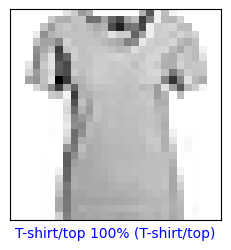

In [36]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

## 🎯 Desafio 3: Implementando a LeNet-5 - A CNN Pioneira

### 📚 Contexto Histórico

A **LeNet-5**, desenvolvida por **Yann LeCun** em 1998, foi uma das primeiras CNNs bem-sucedidas e estabeleceu muitos dos princípios fundamentais ainda usados hoje.

### 🏗️ Arquitetura da LeNet-5

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/lenet.png?raw=1" width="800px">

**Especificações originais:**
```
INPUT(32×32×1) → CONV1(28×28×6) → POOL1(14×14×6) → 
CONV2(10×10×16) → POOL2(5×5×16) → FC1(120) → FC2(84) → OUTPUT(10)
```

### 🎯 Características da LeNet-5:

1. **Entrada**: 32×32 pixels (grayscale)
2. **C1**: 6 filtros 5×5, sem padding
3. **S2**: Subsampling (average pooling) 2×2
4. **C3**: 16 filtros 5×5
5. **S4**: Subsampling 2×2
6. **FC5**: 120 neurônios
7. **FC6**: 84 neurônios
8. **OUTPUT**: 10 classes

### 💡 Desafio para Você:

**Implemente a LeNet-5 adaptada para Fashion MNIST (28×28) seguindo estas especificações:**

```python
# Sua implementação deve seguir esta estrutura:
def create_lenet5_fashion():
    model = keras.Sequential([
        # C1: Convolutional Layer
        # S2: Subsampling Layer (Pooling)
        # C3: Convolutional Layer
        # S4: Subsampling Layer
        # Flatten
        # FC5: Dense Layer (120 neurons)
        # FC6: Dense Layer (84 neurons)
        # Output Layer (10 classes)
    ])
    return model
```

### 📋 Requisitos do Desafio:

1. ✅ **Implementar LeNet-5** seguindo a arquitetura original
2. ✅ **Comparar com sua CNN simples** anterior
3. ✅ **Analisar diferenças** de performance
4. ✅ **Documentar observações** sobre cada camada
5. ✅ **Visualizar resultados** e métricas

### 🎯 Métricas de Sucesso:

- **Acurácia > 85%** no Fashion MNIST
- **Menos overfitting** que a CNN simples
- **Análise comparativa** detalhada
- **Código bem documentado**

### 💭 Perguntas para Reflexão:

1. **Por que LeNet-5 tem 2 camadas convolucionais?**
2. **Qual a vantagem de ter camadas FC decrescentes (120→84→10)?**
3. **Como a LeNet-5 se compara com CNNs modernas?**
4. **O que você mudaria na arquitetura original?**

In [ ]:
# 🎯 DESAFIO 3: SUA IMPLEMENTAÇÃO DA LENET-5
print("🎯 DESAFIO 3: IMPLEMENTANDO LENET-5")
print("=" * 50)

def create_lenet5_fashion():
    """
    Implementa a arquitetura LeNet-5 adaptada para Fashion MNIST
    
    Arquitetura:
    - Conv2D: 6 filtros 5x5
    - AvgPool2D: 2x2
    - Conv2D: 16 filtros 5x5  
    - AvgPool2D: 2x2
    - Flatten
    - Dense: 120 neurônios
    - Dense: 84 neurônios
    - Dense: 10 classes (softmax)
    """
    
    print("🏗️ Construindo LeNet-5...")
    
    # COMPLETE A IMPLEMENTAÇÃO AQUI:
    # ====================================
    
    model = keras.Sequential([
        # 🔍 PRIMEIRA CAMADA CONVOLUCIONAL
        # layers.Conv2D(?, (?,?), activation='?', input_shape=(28,28,1)),
        
        # 🏊 PRIMEIRA CAMADA DE POOLING  
        # layers.AveragePooling2D((?,?)),
        
        # 🔍 SEGUNDA CAMADA CONVOLUCIONAL
        # layers.Conv2D(?, (?,?), activation='?'),
        
        # 🏊 SEGUNDA CAMADA DE POOLING
        # layers.AveragePooling2D((?,?)),
        
        # 📏 FLATTEN
        # layers.Flatten(),
        
        # 🧠 CAMADAS DENSAS
        # layers.Dense(?, activation='?'),
        # layers.Dense(?, activation='?'),
        # layers.Dense(?, activation='?')  # Saída
    ])
    
    # ====================================
    
    return model

# TESTE SUA IMPLEMENTAÇÃO:
print("🧪 TESTANDO SUA IMPLEMENTAÇÃO:")

# Descomente as linhas abaixo após implementar:
# lenet5_model = create_lenet5_fashion()
# lenet5_model.summary()

# print(f"\n📊 COMPARAÇÃO COM CNN SIMPLES:")
# print(f"   CNN Simples: {model.count_params():,} parâmetros")
# print(f"   LeNet-5: {lenet5_model.count_params():,} parâmetros")

print("\n💡 DICAS:")
print("   • Use activation='tanh' para ser mais fiel ao original")
print("   • Average pooling era usado na LeNet-5 original")
print("   • Analise o número de parâmetros em cada camada")
print("   • Compare a performance com sua CNN simples")

print("\n🎯 APÓS IMPLEMENTAR, TREINE E COMPARE:")
print("   1. Compile o modelo")
print("   2. Treine por algumas épocas")
print("   3. Compare métricas com CNN simples")
print("   4. Analise diferenças arquiteturais")

In [ ]:
# 🔍 ANÁLISE COMPARATIVA (Complete após implementar)
print("🔍 ANÁLISE COMPARATIVA: CNN SIMPLES vs LENET-5")
print("=" * 60)

# Esta seção deve ser preenchida após você implementar a LeNet-5

print("📊 RESULTADOS COMPARATIVOS:")
print("=" * 30)

# Exemplo de template para suas análises:
comparacao = {
    'Métrica': ['Parâmetros', 'Acurácia Treino', 'Acurácia Teste', 'Tempo Treino', 'Overfitting'],
    'CNN Simples': ['?', '?', '?', '?', '?'],
    'LeNet-5': ['?', '?', '?', '?', '?']
}

print("| Métrica | CNN Simples | LeNet-5 |")
print("|---------|-------------|---------|")
for i, metrica in enumerate(comparacao['Métrica']):
    print(f"| {metrica} | {comparacao['CNN Simples'][i]} | {comparacao['LeNet-5'][i]} |")

print(f"\n🎯 SUAS CONCLUSÕES:")
print("=" * 20)
print("1. Qual modelo teve melhor performance? Por quê?")
print("   Resposta: ________________________________")
print("")
print("2. Qual a principal diferença arquitetural?")
print("   Resposta: ________________________________")
print("")
print("3. LeNet-5 ainda é relevante hoje? Por quê?")
print("   Resposta: ________________________________")
print("")
print("4. O que você mudaria na LeNet-5 original?")
print("   Resposta: ________________________________")

print(f"\n🏆 PRÓXIMOS PASSOS:")
print("   • Experimente diferentes funções de ativação")
print("   • Teste com dropout para reduzir overfitting")
print("   • Implemente data augmentation")
print("   • Compare com arquiteturas modernas")

## 🚀 Desafio Extra: CNN para CIFAR-10

### 🎯 Por que CIFAR-10 é Mais Desafiador?

O **CIFAR-10** é significativamente mais complexo que Fashion MNIST:

| Aspecto | Fashion MNIST | CIFAR-10 |
|---------|---------------|----------|
| **Resolução** | 28×28 | 32×32 |
| **Canais** | 1 (grayscale) | 3 (RGB) |
| **Classes** | 10 roupas | 10 objetos |
| **Complexidade** | Texturas simples | Objetos naturais |
| **Variabilidade** | Baixa | Alta |

### 🏷️ Classes do CIFAR-10:
- ✈️ **airplane** | 🚗 **automobile** | 🐦 **bird** | 🐱 **cat** | 🦌 **deer**
- 🐶 **dog** | 🐸 **frog** | 🐴 **horse** | 🚢 **ship** | 🚛 **truck**

### 💡 Estratégias Recomendadas:

#### 1️⃣ **Arquitetura Mais Profunda**
```python
# CNN mais robusta para CIFAR-10
model = Sequential([
    # Bloco 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Bloco 2  
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Classificador
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
```

#### 2️⃣ **Técnicas Essenciais**
- **Data Augmentation**: Rotação, flip, zoom
- **Batch Normalization**: Estabiliza treinamento
- **Dropout**: Reduz overfitting
- **Learning Rate Scheduling**: Melhora convergência

#### 3️⃣ **Métricas de Sucesso**
- 🎯 **Baseline**: >70% acurácia
- 🚀 **Bom**: >80% acurácia  
- 🏆 **Excelente**: >85% acurácia

### 🎯 Seu Desafio:

In [ ]:
# 🚀 DESAFIO EXTRA: CNN PARA CIFAR-10
print("🚀 DESAFIO EXTRA: CNN PARA CIFAR-10")
print("=" * 50)

# Passo 1: Carregamento e Preparação dos Dados
print("📊 CARREGANDO CIFAR-10...")

# COMPLETE AQUI:
# ===============================================

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# print(f"Formato dos dados: {x_train.shape}")
# print(f"Classes: {np.unique(y_train)}")

# # Normalização
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Nomes das classes
# cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                   'dog', 'frog', 'horse', 'ship', 'truck']

# ===============================================

print("✅ Dados carregados e normalizados!")

# Passo 2: Visualização dos Dados
print("\n🖼️ VISUALIZANDO AMOSTRAS DO CIFAR-10:")

# COMPLETE A VISUALIZAÇÃO:
# ===============================================

# fig, axes = plt.subplots(2, 5, figsize=(12, 6))
# for i in range(10):
#     ax = axes[i//5, i%5]
#     ax.imshow(x_train[i])
#     ax.set_title(f'{cifar10_classes[y_train[i][0]]}')
#     ax.axis('off')
# plt.show()

# ===============================================

# Passo 3: Construção da CNN
print("\n🏗️ CONSTRUINDO CNN PARA CIFAR-10:")

def create_cifar10_cnn():
    """
    Crie uma CNN robusta para CIFAR-10
    
    Requisitos:
    - Pelo menos 3 blocos convolucionais
    - Batch Normalization
    - Dropout para regularização
    - Data Augmentation
    """
    
    # COMPLETE SUA IMPLEMENTAÇÃO:
    # ===================================
    
    # model = keras.Sequential([
    #     # Bloco 1: Conv + BatchNorm + Pool + Dropout
    #     
    #     # Bloco 2: Conv + BatchNorm + Pool + Dropout
    #     
    #     # Bloco 3: Conv + BatchNorm + Pool + Dropout
    #     
    #     # Classificador: Flatten + Dense + Dropout + Output
    # ])
    
    # ===================================
    
    return None  # Substitua por seu modelo

# Passo 4: Data Augmentation
print("\n🔄 CONFIGURANDO DATA AUGMENTATION:")

# COMPLETE A CONFIGURAÇÃO:
# ===============================================

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     zoom_range=0.1
# )

# ===============================================

# Passo 5: Treinamento
print("\n🚀 TREINAMENTO DO MODELO:")

# COMPLETE O TREINAMENTO:
# ===============================================

# model = create_cifar10_cnn()
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

# # Callbacks
# callbacks = [
#     keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
#     keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
# ]

# # Treinamento
# history = model.fit(
#     datagen.flow(x_train, y_train, batch_size=32),
#     steps_per_epoch=len(x_train) // 32,
#     epochs=50,
#     validation_data=(x_test, y_test),
#     callbacks=callbacks
# )

# ===============================================

print("✅ Configure seu modelo e inicie o treinamento!")

# Passo 6: Avaliação e Análise
print("\n📊 TEMPLATE PARA ANÁLISE DE RESULTADOS:")
print("=" * 40)

resultado_template = """
🎯 RESULTADOS FINAIS:
   Acurácia no teste: ____%
   Tempo de treinamento: ____
   Épocas necessárias: ____

🔍 ANÁLISE:
   1. Overfitting observado? ____
   2. Data augmentation ajudou? ____
   3. Qual classe teve pior performance? ____
   4. Principais desafios encontrados: ____

🚀 MELHORIAS PROPOSTAS:
   1. ____________________
   2. ____________________
   3. ____________________

📈 COMPARAÇÃO COM FASHION MNIST:
   Dificuldade: ____x maior
   Tempo: ____x maior
   Performance: ____% vs ____%
"""

print(resultado_template)

print("\n💡 DICAS IMPORTANTES:")
print("   • CIFAR-10 requer mais épocas que Fashion MNIST")
print("   • Use GPU se disponível para acelerar treinamento")
print("   • Monitore overfitting cuidadosamente")
print("   • Experimente diferentes learning rates")
print("   • Transfer learning pode ser uma alternativa")

print("\n🏆 META FINAL:")
print("   Alcançar >80% acurácia no CIFAR-10 com sua CNN!")

## 🎓 Conclusões e Próximos Passos

### ✅ O que aprendemos hoje:

1. **Fundamentos**: Operação de convolução, pooling e arquitetura CNN
2. **Implementação**: TensorFlow/Keras para construir CNNs
3. **Comparação**: CNNs vs MLPs tradicionais em termos de eficiência
4. **Aplicação**: Classificação de imagens com Fashion MNIST
5. **Arquiteturas históricas**: LeNet-5 e sua importância
6. **Desafios práticos**: CIFAR-10 como próximo passo

### 🚀 Próximos passos recomendados:

1. **Arquiteturas modernas**: ResNet, VGG, EfficientNet
2. **Transfer Learning**: Usar modelos pré-treinados
3. **Técnicas avançadas**: Data augmentation, batch normalization
4. **Aplicações**: Detecção de objetos, segmentação semântica
5. **Vision Transformers**: Estado da arte atual

### 📚 Recursos para continuar aprendendo:

- 📖 **Livros**: "Deep Learning" (Goodfellow), "Hands-On ML" (Géron)
- 🎓 **Cursos**: CS231n (Stanford), Fast.AI
- 💻 **Prática**: Kaggle competitions, Papers With Code
- 🏆 **Projetos**: Crie seu próprio classificador de imagens

### 💡 Dicas finais:

1. **Comece simples**: LeNet-5 → VGG → ResNet → Modernas
2. **Entenda os dados**: EDA é fundamental
3. **Experimente**: Diferentes arquiteturas e hiperparâmetros
4. **Monitore**: Overfitting vs underfitting
5. **Pratique**: Projetos reais consolidam o aprendizado

---

🎉 **Parabéns por completar este laboratório!** 

Você agora tem uma base sólida em CNNs. Continue explorando e construindo - o mundo da Visão Computacional está cheio de oportunidades fascinantes! 🌟

**Bons estudos e que a força convolucional esteja com você!** 🤖✨